# Modeling with Linear Regression


The universe of statistics and machine learning (ML) is built upon recurring patterns, small
motifs that appear now and again. The most
popular and useful of them is the linear model. This is a very useful
model on its own and also the building block of many other models. If you ever took a
statistics course (even a non-Bayesian one), you may have heard of simple and multiple
linear regression, logistic regression, ANOVA, ANCOVA, and so on. All these methods are
variations of the same underlying motif, the linear regression model.

## Simple linear regression

Many problems we find in science, engineering, and business are of the following form. We
have a variable $x$ and we want to model/predict a variable $y$. Importantly, these variables
are paired like $\left\{ {\left( {{x_1},{y_1}} \right), \ldots ,\left( {{x_n},{y_n}} \right)} \right\}$.

In the most simple scenario, known as simple linear regression, both $x$ and $y$ and are uni-dimensional continuous random variables.
By continuous, we mean a variable represented using real numbers (or floats, if you wish),
and using NumPy, you will represent the variables or as one-dimensional arrays.
Because this is a very common model, the variables get proper names. We call the
$x$ variables the dependent, predicted, or outcome variables, and the $y$ variables the
independent, predictor, or input variables. When is a matrix (we have different
variables), we have what is known as multiple linear regression.

Some typical situations where linear regression models can be used are:
* Model the relationship between factors like rain, soil salinity, and the presence/absence of fertilizer in crop productivity. Then, answer questions such as: is the relationship linear? How strong is this relationship? Which factors have the strongest effect?
* Find a relationship between average chocolate consumption by country and the number of Nobel laureates in that country, and then understand why this relationship could be spurious.
* Predict the gas bill (used for heating and cooking) of your house by using the sun radiation from the local weather report. How accurate is this prediction?

## The machine learning connection

Paraphrasing Kevin P. Murphy, machine learning is an umbrella term for a collection of
methods to automatically learn patterns in data, and then use what we learn to predict
future data or to take decisions under uncertainty. ML and statistics are really intertwined
subjects, and the connection becomes clear if you took a probabilistic perspective, as Kevin
Murphy does in his great book Machine learning: A probabilistic perspective. While these
domains are deeply connected at a conceptual and mathematical level, the jargon could
make the connection opaque. So, let me bring the ML vocabulary to the problem. Using the ML terminology, we say a regression problem is an example of
supervised learning. Under the machine learning framework, we have a regression
problem when we want to learn a mapping from $X$ to $Y$, with $Y$ being a continuous
variable.

A machine learner usually talks about features instead of variables. We say that the
learning process is supervised because we know the values of the
pairs; in some sense,
we know the correct answer, and all the remaining questions are about how to generalize
these observations (or this dataset) to any possible future observation, that is, to a situation
when we know $X$ but not $Y$.

## The core of the linear regression models

Now that we have discussed some general ideas about linear regression and we have also
established a bridge between the vocabulary used in statistics and ML, let's begin to learn
how we can build linear models.

The chances are high that you are already familiar with the following equation:

$$y_i=\alpha+x_i \beta$$

This equation says that there is a linear relation between the variable $x$ and the variable $y$.
The parameter $\beta$ controls the slope of the linear relationship and thus is interpreted as the
change in the variable $y$ per unit change in the variable $x$. The other parameter, $\alpha$, is known
as the intercept, and tells us the value of $y_i$ when $x_i=0$. Graphically, the intercept is the
value of the point where the line intercepts the y axis.

There are several ways to find the parameters for a linear model; one method is known as
**least squares fitting**. Least squares returns the values of $\alpha$ and $\beta$ yielding the lowest
average quadratic error between the observed $y$ and the predicted $y$. Expressed in that way,
the problem of estimating $\alpha$ and $\beta$ is an optimization problem, that is, a problem where we
try to find the minima or maxima of some function. An alternative to optimization is to
generate a fully probabilistic model. Thinking probabilistically gives us several advantages;
we can obtain the best values of $\alpha$ and $\beta$ (the same as with optimization methods) together
with an estimation of the uncertainty we have about the parameter's values. Optimization
methods require extra work to provide this information. Additionally, the probabilistic
approach, especially when done using tools such as PyMC3, will give us the flexibility to
adapt models to particular problems.

The point-estimate obtained using the least squares method will agree with
the **maximum a posteriori (MAP)** (the mode of the posterior) from a
Bayesian simple linear regression with flat priors.

Probabilistically, a linear regression model can be expressed as follows:

$$y = \alpha  + \beta x + error$$

where $error$ is a Normal random variable with mean 0 and standard deviation $\epsilon$. This implies that.

$$y \sim N\left( {\mu  = \alpha  + x\beta , \epsilon} \right).$$

That is, the data vector is assumed to be distributed as a Gaussian with a mean of $\alpha+x\beta$
and with a standard deviation of $\epsilon$.

Since we do not know the values of $\alpha$, $\beta$, or $\epsilon$, we have to set prior distributions for them. A
reasonable generic choice would be:

$$\begin{gathered}
  \alpha  \sim N\left( {{\mu _\alpha },{\sigma _\alpha }} \right) \hfill \\
  \beta  \sim N\left( {{\mu _\beta },{\sigma _\beta }} \right) \hfill \\
  \epsilon \sim \left| {N\left( {0,{\sigma_\epsilon}} \right)} \right| \hfill \\ 
\end{gathered}$$

For the prior over $\alpha$, we can use a very flat Gaussian by setting the value $\sigma_\alpha$
to a relatively
high value for the scale of the data. In general, we do not know where the intercept can be,
and its value can vary a lot from one problem to another and for different domain
knowledge. For many problems I have worked on, is usually centered around zero and
with a $\sigma_\alpha$
no larger than 10, but this is just my experience (almost anecdotal) with a small
subset of problems and not something easy to transfer to other problems. Regarding the
slope, it may be is easier to have a general idea of what to expect than for the intercept. For
many problems, we can at least know the sign of the slope a priori; for example, we expect
the variable weight to increase, on average, with the variable height. For epsilon, we can
set $\sigma_\epsilon$
to a large value on the scale of the variable $y$, for example, ten times the value for its
standard deviation. These very vague priors guarantee a very small effect of the prior on
the posterior, which is easily overcome by the data.

A couple of alternatives to the Half-Gaussian distribution for $\epsilon$ are the Uniform or the half-
Cauchy distributions. The half-Cauchy distribution generally works well as a good
regularizing prior and the Uniform
distributions are generally not a very good choice unless you know that the parameter is
truly restricted by hard boundaries. If we want to use really strong priors around some
specific value for the standard deviation, we can use the gamma distribution. The default
parameterization of the gamma distribution in many packages can be a little bit confusing
at first, but fortunately PyMC3 allows us to define it using the shape and rate (probably the
most common parameterization) or the mean and standard deviation (probably a more
intuitive parameterization, at least for newcomers).

To see how the gamma and other distributions look like, you can check out the PyMC3
documentation [here](https://docs.pymc.io/api/distributions/continuous.html).

Going back to the linear regression model, we can use the nice and easy to interpret
Kruschke diagrams to represent them 

<img src="images/krucher_linear.PNG">

In Kruschke diagrams we use the symbol = to define deterministic
variables (such as $\mu$) and ∼ to define stochastic variables such as $\alpha$, $\beta$, and $\epsilon$.

**NOTE:** In thise particular Kruschke diagram, I'm taking $\epsilon$ as a HalfCauchy distribution.

Now that we have defined the model, we need the data to feed the model. We
are going to rely on a synthetic dataset to build intuition on the model. One advantage of a
synthetic dataset is that we know the correct values of the parameters and we can check if
we are able to recover them with our models:

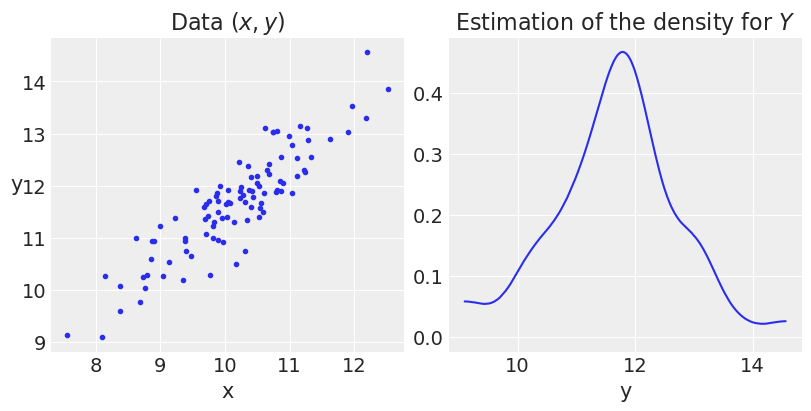

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# We generate 100 samples of Y=alpha+beta*X+error
# where the real value of alpha is 2.5 and the
# real value of beta is 0.9.
# error is taken as a Normal distribution with
# mean 0 and standard deviation 0.5.
N = 100
alpha_real = 2.5
beta_real = 0.9
epsilon_real = 0.5
np.random.seed(1)
error = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + error

# We plot the sampled data
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].set_title(r'Data $(x,y)$')
# ax[0].plot(x, y_real, 'k')

# KDE is an estimator of the density
az.plot_kde(y, ax=ax[1])
ax[1].set_title(r'Estimation of the density for $Y$')
ax[1].set_xlabel('y')
plt.show()

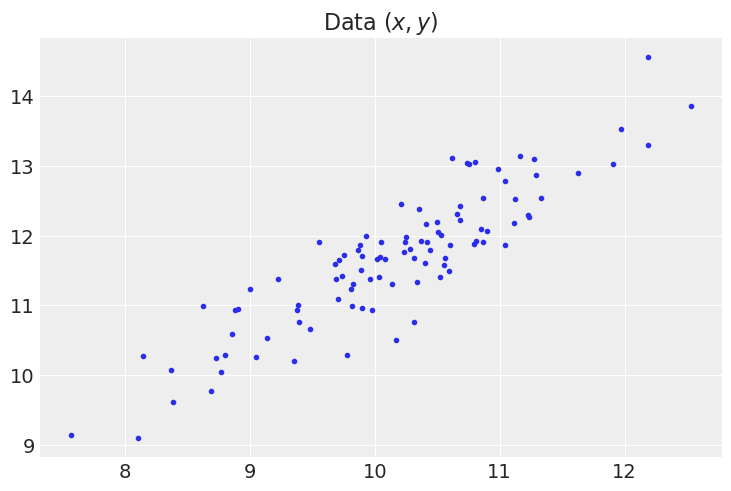

In [29]:
plt.plot(x, y, 'C0.')
plt.title(r'Data $(x,y)$')
plt.show()

Now, we will use PyMC3 to build and fit the model. $\mu$ will be expressed in the model as a deterministic
variable, reflecting what we have already written in mathematical notation and in the
Kruschke's diagram. If we specify a PyMC3 deterministic variable, we are telling PyMC3 to
compute and save the variable in the trace:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 42 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


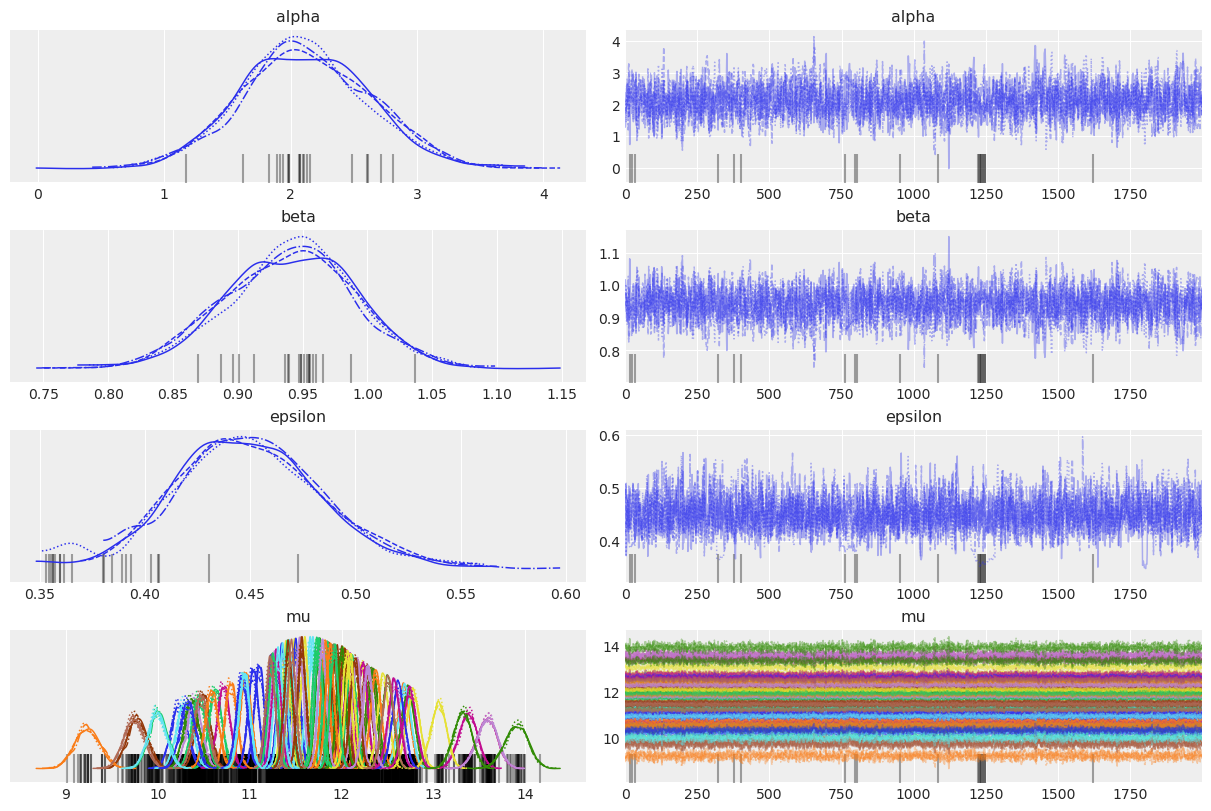

In [32]:
import pymc3 as pm

with pm.Model() as model_g:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = pm.Deterministic('mu', alpha + beta * x)
    # Likelihood
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    trace_g = pm.sample(2000, return_inferencedata=False)
    az.plot_trace(trace_g)

Beacuse we are including the deterministic variable $\mu$ in the model, PyMC3 is including in the trace and
that's why are getting many different plots for $\mu$.

Alternatively, instead of including a deterministic variable in the model, we can omit it. In
such a case, the variable will still be computed but not saved in the trace. For example, we
could have written the following:

````python
y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
````

Also, we can omit the deterministic variable of the plots by passing the names of the variables we want to
include in the plot as a list to the var_names argument. Many ArviZ functions have a
var_names argument:

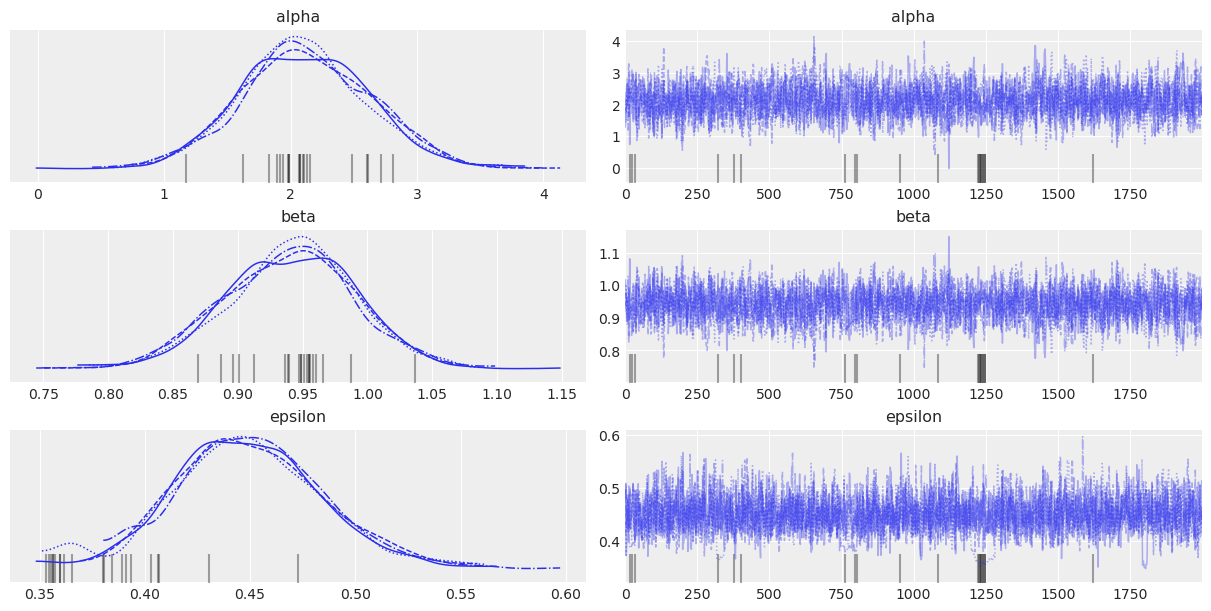

In [36]:
# This line is the same as
# az.plot_trace(trace_g, var_names=['alpha','beta','epsilon'])
# I'm only using az.from_pymc3 to avoid the warning
# az.plot_trace(az.from_pymc3(trace_g, model=model_g), var_names=['alpha','beta','epsilon'])
# plt.show()
az.plot_trace(az.from_pymc3(trace_g, model=model_g), var_names=['alpha','beta','epsilon'])
plt.show()

Let's plot the posterior distribitions for $\alpha$, $\beta$ and $\epsilon$

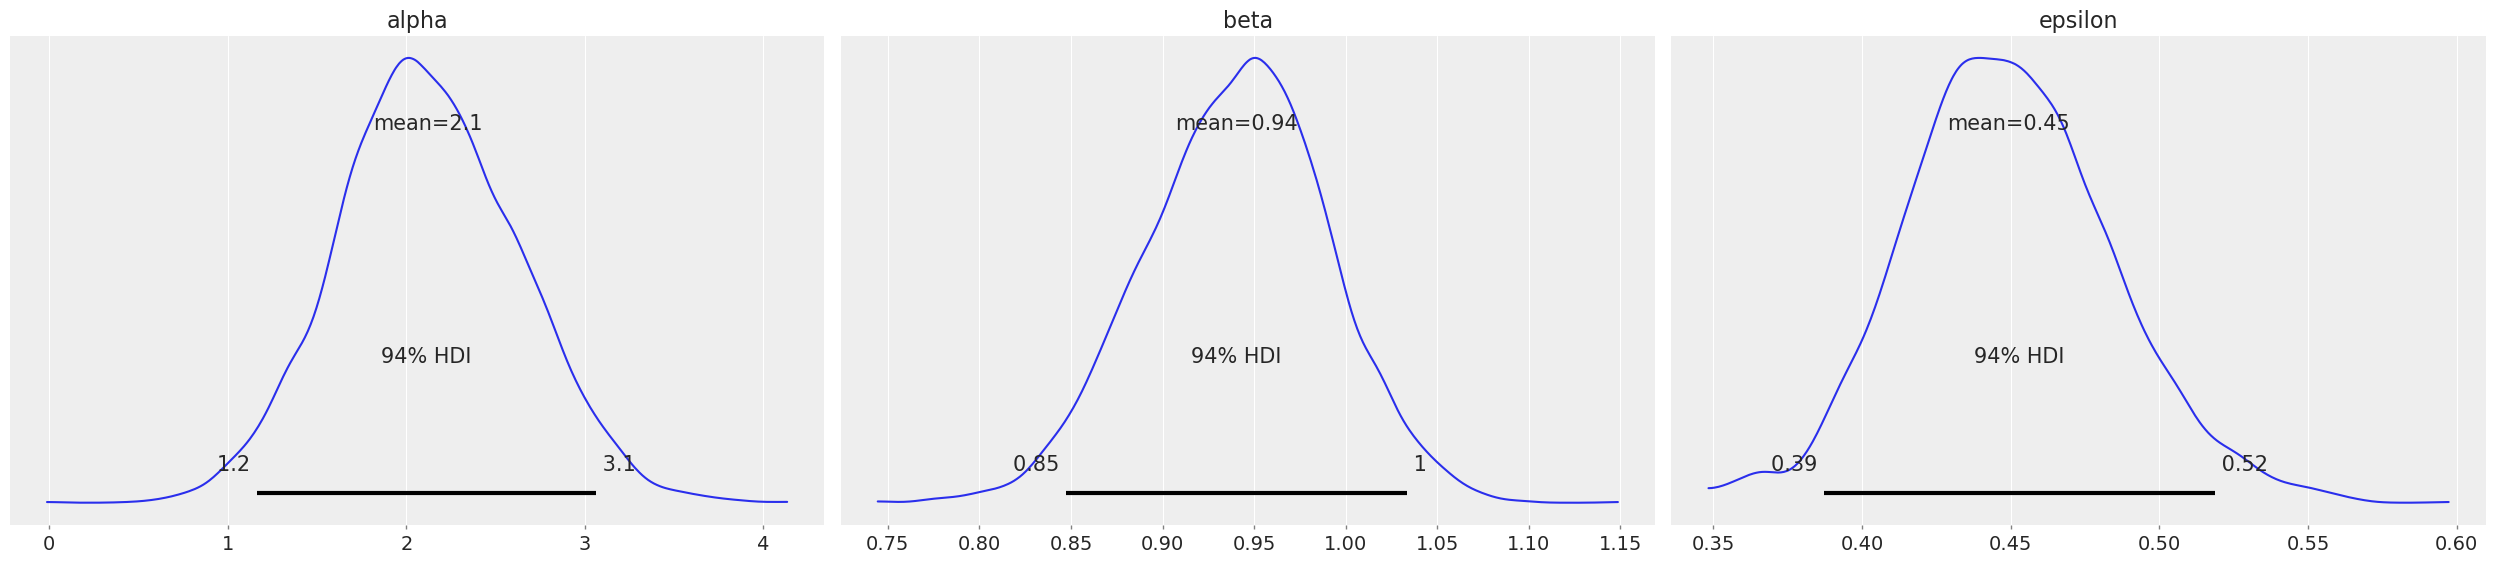

In [37]:
az.plot_posterior(az.from_pymc3(trace_g, model=model_g), var_names=['alpha','beta','epsilon'])
plt.show()

## Linear models and high autocorrelation

Linear models lead to posterior distribution where $\alpha$ and $\beta$ are highly correlated.

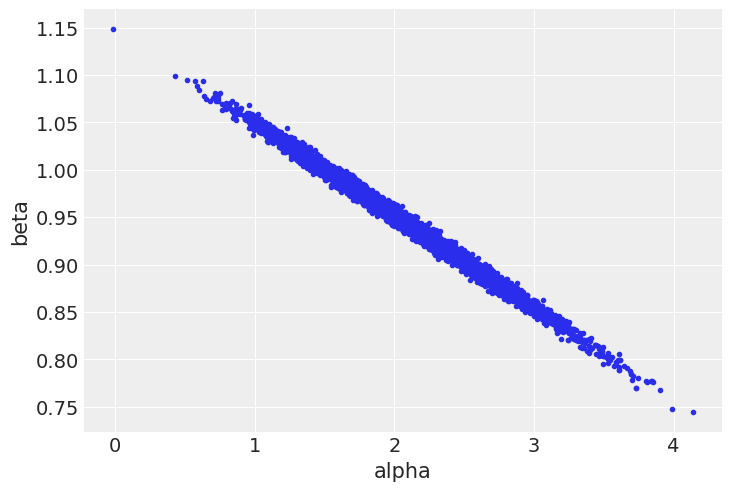

In [38]:
# This line is to get the grid
az.style.use('arviz-darkgrid')
az.plot_pair(az.from_pymc3(trace_g, model=model_g), var_names=['alpha', 'beta'])
plt.show()

The correlation we are seeing is a direct consequence of our assumptions. No
matter which line we fit to our data, all of them should pass for one point, that is, the mean
of the variable $x$ and the mean of the variable $y$. Hence, the line fitting process is somehow
equivalent to spinning a straight line fixed at the center of the data, like a wheel of fortune.
An increase in the slope means a decrease of the intercept and vice versa. Both parameters
are going to be correlated by definition of the model. Hence, the shape of the posterior
(excluding ) is a very diagonal space. This can be problematic for samplers such as
Metropolis-Hastings and to a lesser extent NUTS.

Before continuing and for the sake of truth, let me clarify something. The fact that the line is
constrained to pass through the mean of the data is only true for the least square method
(and its assumptions).  Using Bayesian methods, this constraint is relaxed. in general, we get lines around the mean values of $x$ and $y$ and
not exactly through the exact mean. Moreover, if we use strong priors, we could end up
with lines far away from the mean of $x$ and $y$. Nevertheless, the idea that the
autocorrelation is related to the line spinning around a more or less defined point remains
true.

### Modifying the data before running

One simple way to remove the correlation of $\alpha$ and $\beta$ is to center the variable. For each
data point, we subtract the mean of the $x$ variable ($\overline x$):

$${x_i}^\prime  = {x_i} - \overline x $$

As a result, $x^\prime$ will be centered at 0, and hence the pivot point when changing the slope is
exactly the intercept, and thus the plausible parameter space is now more circular and less
correlated.

Let's center the data in our previous example

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 31 seconds.


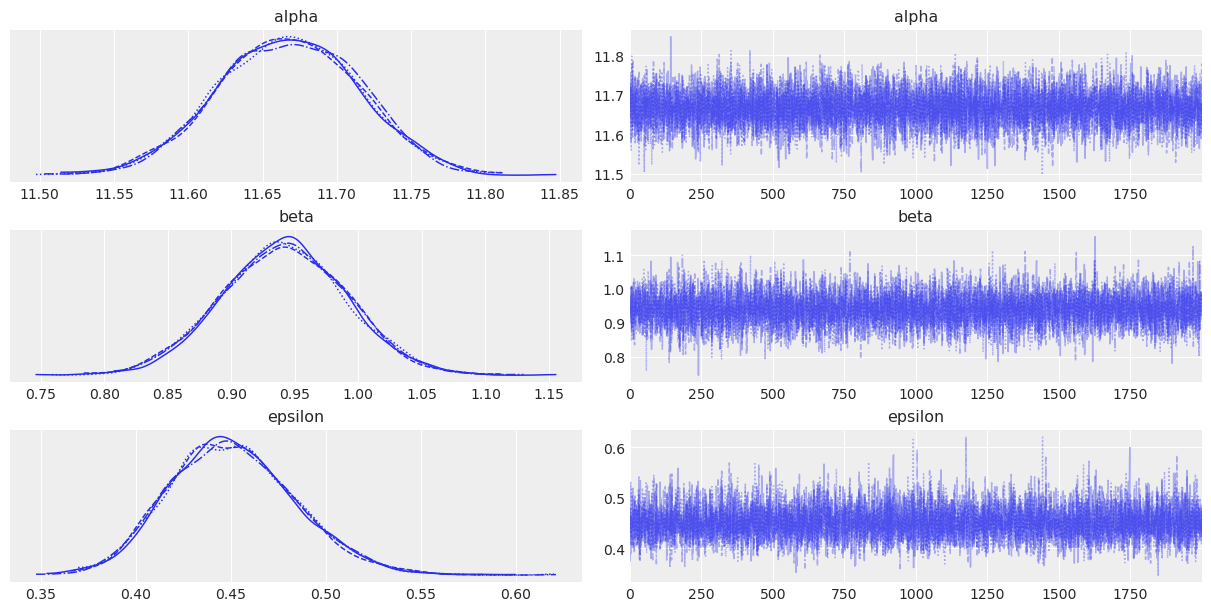

In [39]:
x_centered = x-np.average(x)
with pm.Model() as model_g_centered:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = pm.Deterministic('mu', alpha + beta * x_centered)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    trace_g_centered = pm.sample(2000, return_inferencedata=False)
    az.plot_trace(trace_g_centered, var_names=['alpha','beta','epsilon'])

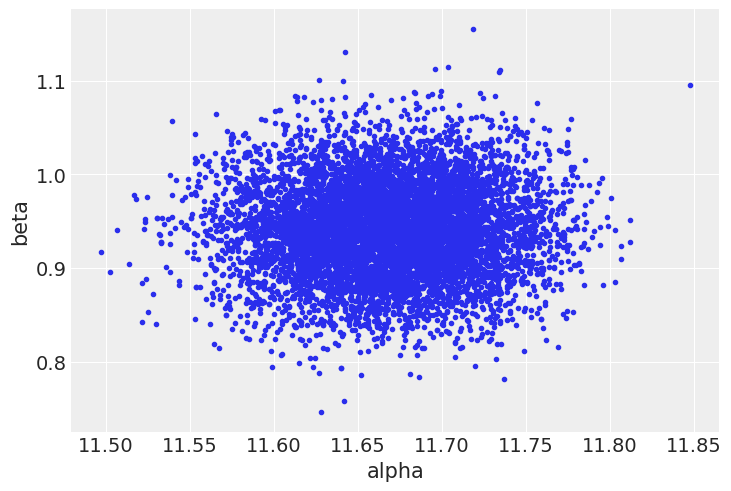

In [40]:
az.plot_pair(az.from_pymc3(trace_g_centered, model=model_g_centered), var_names=['alpha', 'beta'])
plt.show()

As we can see, now the plausible parameter space is now more circular and less correlated.

Now, let's see the posterior distributions:

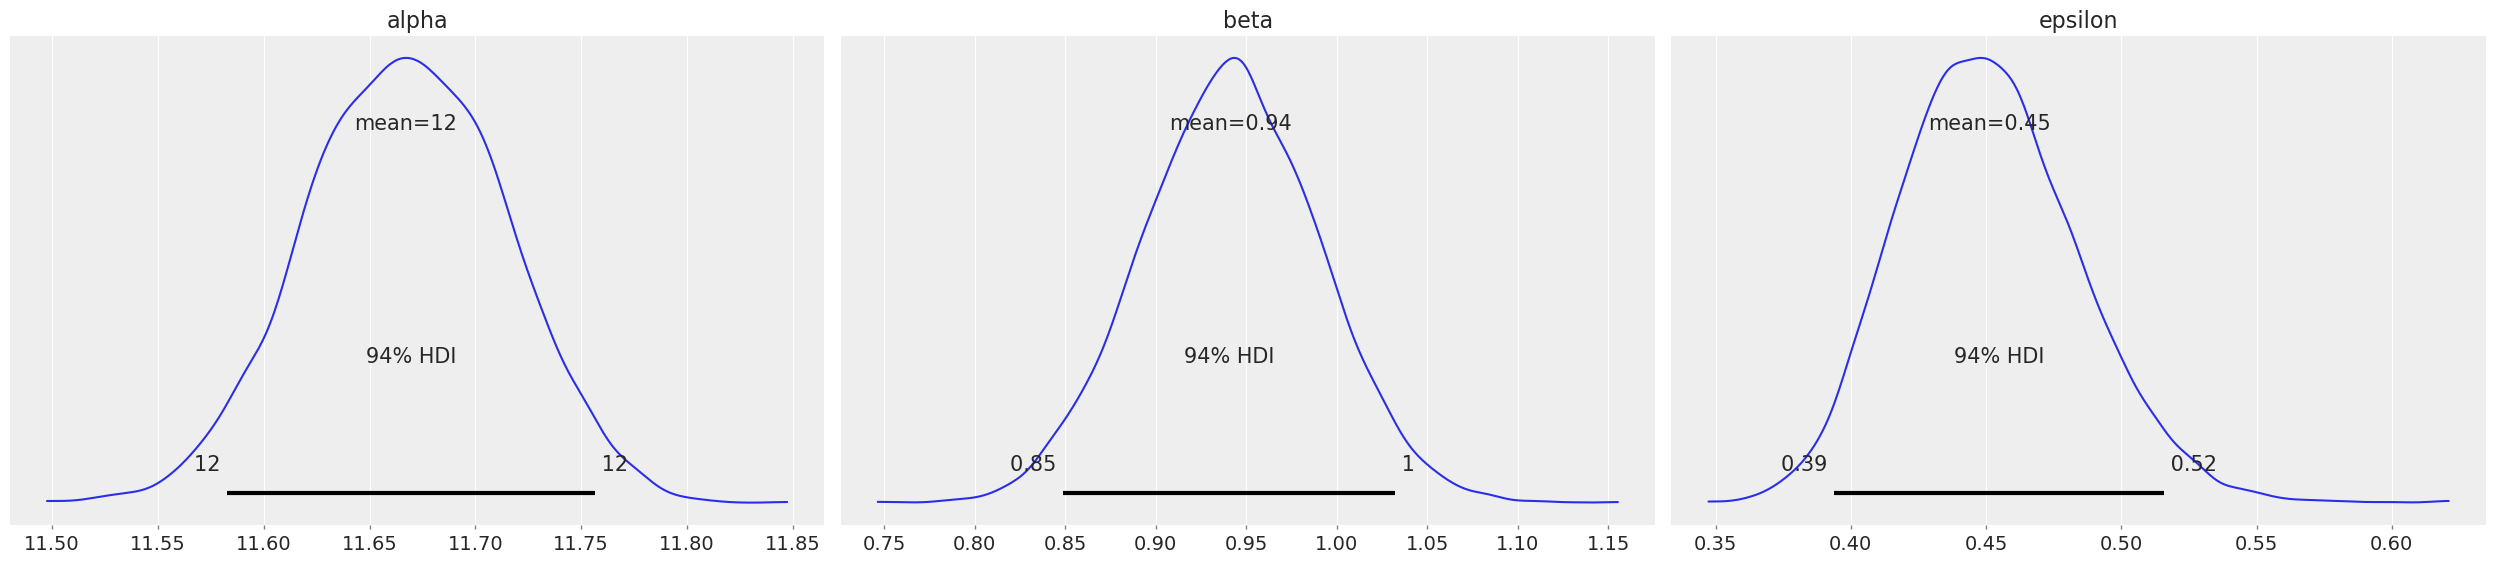

In [41]:
az.plot_posterior(az.from_pymc3(trace_g_centered, model=model_g_centered), var_names=['alpha','beta','epsilon'])
plt.show()

Centering data is not only a computational trick; it can also help in interpreting the results.
The intercept is the value of $y$ when $x=0$. For many problems, this interpretation has no
real meaning. For example, for quantities such as the height or weight, values of zero are
meaningless and hence the intercept has no value in helping to make sense of the data.
Instead, when centering the variables, the intercept is always the value of $y_i$ for the mean
value of $x$.

For some problems, it may be useful to estimate the intercept precisely because it is not
feasible to experimentally measure the value of $x_i=0$
and so the estimated intercept can
provide us with valuable information. However, extrapolations can be problematic, so be
careful when doing this!

We may want to report the estimated parameters in terms of the centered data or in terms
of the uncentered data, depending on our problem and audience. If we need to report the
parameters as if they were determined in the original scale, we can do the following to put
them back into the original scale:

$$\alpha  = {\alpha ^\prime } - {\beta ^\prime }\bar x.$$

We also have that

$$\beta=\beta^\prime$$

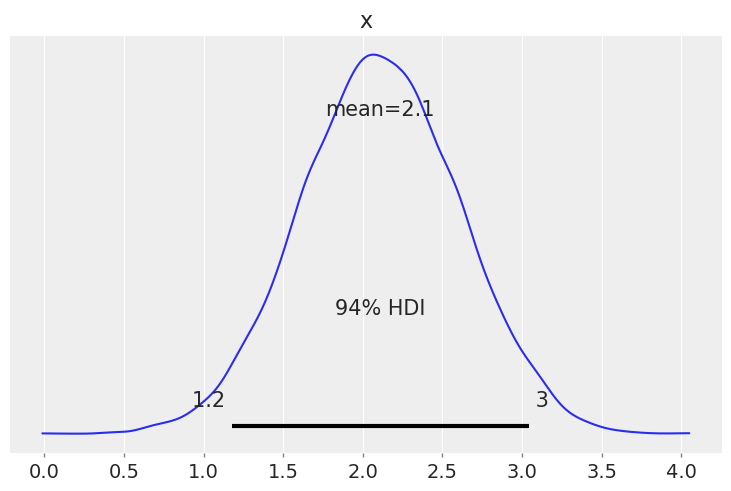

In [42]:
# The following code reports the posterior distribution of alpha in the original scale
az.plot_posterior(trace_g_centered['alpha']-trace_g_centered['beta']*np.average(x))
plt.show()

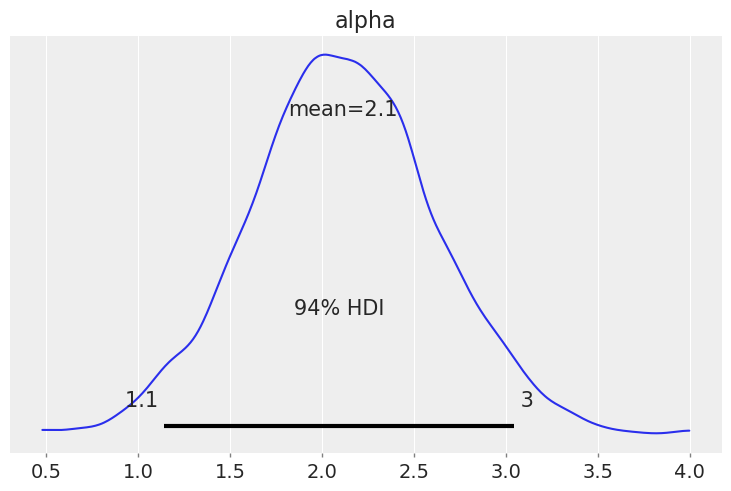

In [15]:
# This is just the posterior distribution for alpha obtained without centering, you can see that it looks very similar
# to the one we obtained before
az.plot_posterior(az.from_pymc3(trace_g, model=model_g), var_names=['alpha'])
plt.show()

We can even go further than centering and transforming the data by standardizing it
before running models. Standardizing is a common practice for linear regression models in
statistics and ML since many algorithms behave better when the data is standardized. This
transformation is achieved by centering the data and dividing it by the standard deviation.
Mathematically we have:
$$
\begin{align*}
{x^\prime } &= \frac{{x - \bar x}}{{{x_{sd}}}}\\
{y^\prime } &= \frac{{y - \bar y}}{{{y_{sd}}}}.
\end{align*}
$$

One advantage of standardizing the data is that we can always use the same weakly
informative priors without having to think about the scale of the data. For standardized
data, the intercept will always be around 0 and the slope will be restricted to the interval
[-1, 1]. Additionally, standardizing the data allow us to talk in terms of Z-scores, that is, in
units of standard deviations. If someone says the value of a parameter is -1.3 in Z-score
units, we automatically know that the value in question is 1.3 standard deviations below
the mean, irrespective of the actual value of the mean or the actual value of the standard
deviation of the data. A change in one Z-score unit is a change in one standard deviation,
whatever the scale of the original data is. This can be very useful when working with
several variables; having all of the variables in the same scale can simplify the
interpretation of the data

## Interpreting and visualizing the posterior

As we have already seen, we can explore the posterior using ArviZ functions like
`plot_trace` and `summary`, or we can use our own functions. For a linear regression, it
could be useful to plot the average line that fits the data, together with the average mean
values of $\alpha$ and $\beta$. To reflect the posterior's uncertainty, we can use semitransparent lines
that have been sampled from the posterior:

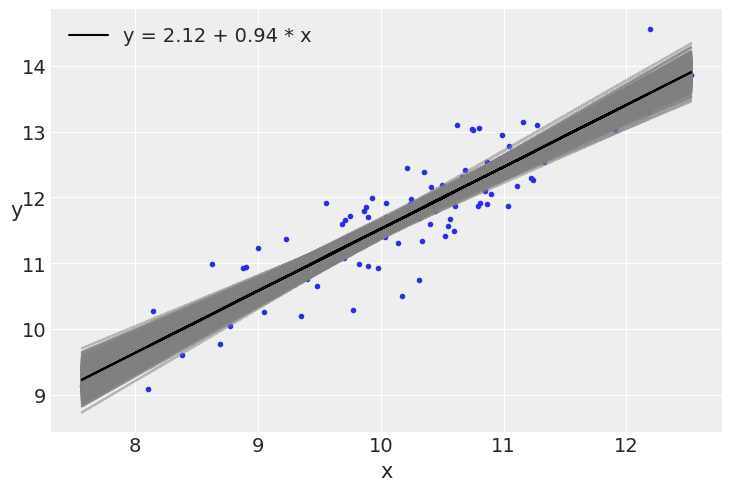

In [47]:
plt.plot(x, y, 'C0.')

# Obtaining the mean value of alpha and beta
alpha_m = trace_g['alpha'].mean()
beta_m = trace_g['beta'].mean()

# This is the gray part. We are plotting the regression lines we obtained 
# during the sampling.
draws = range(0, len(trace_g['alpha']), 5)
plt.plot(x, trace_g['alpha'][draws] + trace_g['beta'][draws]* x[:, np.newaxis], c='gray', alpha=0.5)

# This is the black line. It is the regression line.
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# Just setting the labels
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

Remember that to obtain the posterior distribution PyMC3 do many simulations, obtaining different values of $\alpha$ and $\beta$ on each simulation. What we are plotting with the line
````python
plt.plot(x, trace_g['alpha'][draws] + trace_g['beta'][draws]* x[:, np.newaxis], c='gray', alpha=0.5)
````
are the regression lines for those simulations.

Notice that uncertainty is lower in the middle, although it is not reduced to a single point,
that is, the posterior is compatible with lines not passing exactly through the mean of the
data, as we have already mentioned.

Having the semitransparent lines is perfectly fine, but we may want to add a cool-factor to
the plot and instead use a semitransparent band to illustrate the Highest-Posterior Density
(HPD) interval of $\mu$. In fact, this was the main reason we defined the deterministic variable $\mu$
in the model. Having this variable simplifies the following code:

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\plots\hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


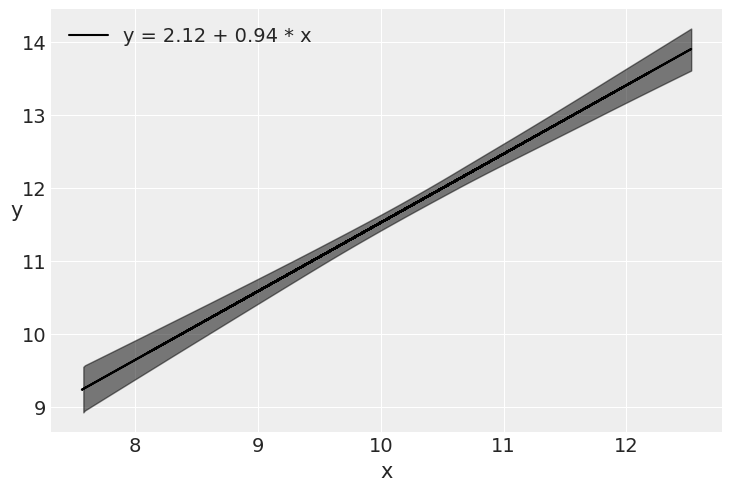

In [48]:
ax = az.plot_hdi(x, trace_g['mu'], hdi_prob=0.98, color='k')
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=0)
ax.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
ax.legend()
plt.show()

One more option is to plot the HPD (for example, 94% and 50%) of the predicted data ,
that is, where we expect to see the 94% and 50% of future data, according to our model. For
this, we are going to use a darker gray for the HPD 50 and a lighter gray for the HPD
95.

C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\plots\hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
C:\Users\carlo\miniconda3\envs\bayesianStats\lib\site-packages\arviz\plots\hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


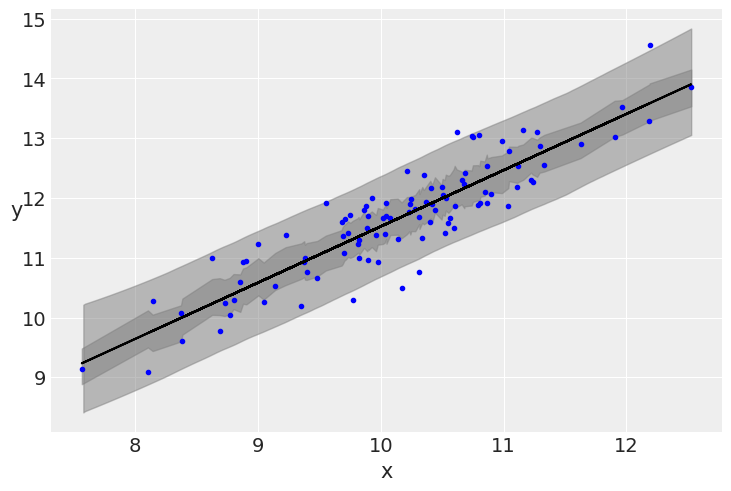

In [50]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

ax=az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.5, color='gray', smooth=False)
az.plot_hdi(x, ppc['y_pred'], hdi_prob=0.94, color='gray', ax=ax)
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()